In [18]:
import torch
import matplotlib.pyplot as plt
import torchvision
import pickle
import numpy as np
%matplotlib inline
#%matplotlib notebook

use_gpu = True if torch.cuda.is_available() else False

model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'DCGAN', pretrained=True, useGPU=use_gpu)

#model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub','PGAN', model_name='celebAHQ-512',pretrained=True, useGPU=use_gpu)

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


In [19]:
model

In [20]:
# num_images = 64
# noise, _ = model.buildNoiseData(num_images)

In [21]:
def save_noise(num_images):
    noise, _ = model.buildNoiseData(num_images)
    with open('test.pickle', mode='wb') as f:
        pickle.dump(noise, f)
        
def generate_images(model,noise):
    return model.test(noise)

In [22]:
def draw_two_images(images):
    img_list = []
    for img in images:
        trans_img = img.permute(1,2,0).cpu().numpy()
        trans_img = np.clip(np.rint((trans_img + 1.0) / 2.0 * 255.0), 0.0, 255.0).astype(np.uint8)
        img_list.append(trans_img)
        if len(img_list) == 2:
            break
    plt.subplot(1, 2, 1)
    plt.imshow(img_list[0])
    plt.subplot(1, 2, 2)
    plt.imshow(img_list[1])

In [23]:
# with open('test.pickle', mode='rb') as f:
#     test_noise = pickle.load(f)
# test_noise.shape

In [24]:
def load_noise():
    with open('test.pickle', mode='rb') as f:
        test_noise = pickle.load(f)
    return test_noise

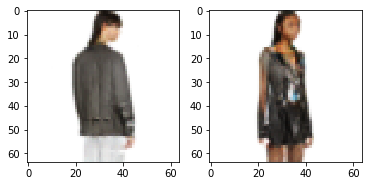

In [25]:
save_noise(64)
noise = load_noise()

with torch.no_grad():
    generated_images = model.test(noise)

draw_two_images(generated_images)
# print(noise.shape)
# print(generated_images.shape)



In [26]:
def get2noise(noise):
    noise_list = []
    for i in noise:
        noise_list.append(i)
        if len(noise_list) == 2:
            break
    return noise_list

n2 = get2noise(noise)

2
torch.Size([120])


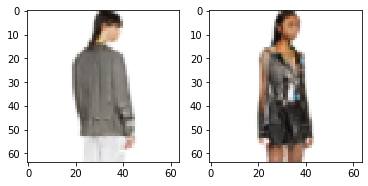

In [27]:
print(len(n2))
print(n2[0].shape)

draw_two_images(generate_images(model,torch.stack(n2)))

In [28]:
def calc_interpolate(noise_list):
    num = 64
    step_size = 1/num
    step = 0
    inp_noise_list = []
    for i in range(0, num):
        r = (1 - step) * noise_list[0] + step * noise_list[1]
        inp_noise_list.append(r)
        step += step_size
    #print(len(inp_noise_list))
    return inp_noise_list

noise_tensor = torch.stack(calc_interpolate(n2))
print(noise_tensor.shape)

torch.Size([64, 120])


In [29]:
images = generate_images(model,noise_tensor)
print(images.shape)

torch.Size([64, 3, 64, 64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


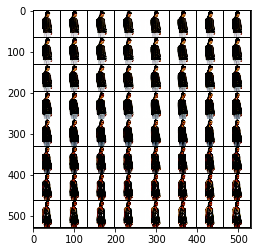

In [30]:
plt.imshow(torchvision.utils.make_grid(images).permute(1, 2, 0).cpu().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


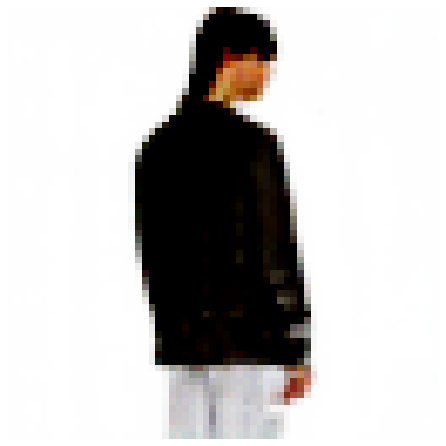

In [31]:
h_fig = plt.figure(figsize=[12, 6])
h_ax = plt.axes([0.0, 0.0, 0.5, 1.0])
h_ax.axis('off')
h_img = plt.imshow(next(iter(generate_images(model,torch.stack(n2)))).cpu().numpy().transpose(1,2,0))

In [32]:

from ipywidgets import interact, widgets
from IPython.display import display
from ipywidgets import Output, FloatSlider, VBox
from IPython.display import clear_output

In [84]:
class two_vecor():

    def __init__(self,model,ns):
        self.vec1 = ns[0]
        self.vec2 = ns[1]
        self.model = model
        img_cur = self.model.test(torch.stack(ns))[0].permute(1,2,0).cpu().numpy()
        img_cur = np.clip(np.rint((img_cur + 1.0) / 2.0 * 255.0), 0.0, 255.0).astype(np.uint8)
#         h_img.set_data(img_cur)
        #plt.imshow(img_cur)   
    
    def gen_img(self, step):
#         fig, ax = plt.subplots()
        noise_list = []
        if type(step) is float:
            r = (1 - step) * self.vec1 + step * self.vec2
        else:
            step = step["new"]
            r = (1 - step) * self.vec1 + step * self.vec2
        noise_list.append(r)
        img = self.model.test(torch.stack(noise_list))
        trans_img = img[0].permute(1,2,0).cpu().numpy()
        trans_img = np.clip(np.rint((trans_img + 1.0) / 2.0 * 255.0), 0.0, 255.0).astype(np.uint8)
        plt.clf()
        plt.imshow(trans_img)
        plt.show()


In [85]:
#out = Output()

#slider = FloatSlider(value=0.1,min=0,max=1.0,step=0.1,)
        
n2 = get2noise(noise)
tmp = two_vecor(model, n2)
#interact.gen_img(step=0.1)
interact(tmp.gen_img, step=(0,1, 0.1))

# slider.observe(tmp.gen_img, 'value')
# display(VBox([slider, out]))

interactive(children=(FloatSlider(value=0.0, description='step', max=1.0), Output()), _dom_classes=('widget-in…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

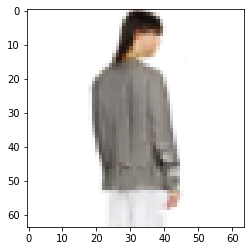

In [83]:
from PIL import Image

noise_list = []
vec1 = n2[0]
vec2 = n2[1]

step = 0.0

for i in range(10):
    r = (1 - step) * vec1 + step * vec2
    step += 0.1
    noise_list.append(r)
    img = model.test(torch.stack(noise_list))

    trans_img = img[0].permute(1,2,0).cpu().numpy()
    trans_img = np.clip(np.rint((trans_img + 1.0) / 2.0 * 255.0), 0.0, 255.0).astype(np.uint8)
    Image.fromarray(trans_img).save("img/sample_{}.png".format(i))

#print((trans1 == trans_img).all())

plt.cla()
plt.imshow(trans_img)
plt.show()
